#### Загрузка набора данных

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import featuretools as ft
import re
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


df = pd.read_csv("../data/car_price_prediction.csv")

df = df.drop(columns=["ID"])

df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 17 columns]

#### Анализ датасета и очистка данных

In [92]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [93]:
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "")
df["Engine volume"] = pd.to_numeric(df["Engine volume"])
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [94]:
df["Mileage"] = df["Mileage"].str.replace("km", "")
df["Mileage"] = df["Mileage"].astype("int64")
df["Mileage"].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [95]:
df["Levy"] = df["Levy"].replace("-", "0")
df["Levy"] = df["Levy"].astype("int64")
df["Levy"].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

In [96]:
df["Cylinders"] = df["Cylinders"].astype("int64")
df["Cylinders"].unique()

array([ 6,  4,  8,  1, 12,  3,  2, 16,  5,  7,  9, 10, 14])

In [97]:
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [98]:
df["Doors"] = df["Doors"].map(
    {"02-Mar": "Двухдверный", "04-May": "Четырехдверный", ">5": "Многодверный"}
)
df["Doors"].unique()

array(['Четырехдверный', 'Двухдверный', 'Многодверный'], dtype=object)

In [99]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([       1,        3,        6, ...,   627220,   872946, 26307500])

In [100]:
print(f"Количество строк до удаления некорректных значений: {len(df)}")
df = df[df["Price"] >= 500]
print(f"Количество строк после удаления некорректных значений: {len(df)}")

Количество строк до удаления некорректных значений: 19237
Количество строк после удаления некорректных значений: 17574


In [101]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([     500,      549,      600, ...,   627220,   872946, 26307500])

In [102]:
sorted_df = df.sort_values(by="Prod. year")
sorted_df["Prod. year"].unique()

array([1943, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1977, 1978, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [103]:
df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     0          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19231   5802  1055  MERCEDES-BENZ    E 350        2013      Sedan   
19232   8467     0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19231              Yes    Diesel            3.5   107800          6   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19235              Yes    Diesel            2.0    51258          4   

      Gear box type Drive wheels           Doors             Wheel   Color  \
0         Automatic          4x4  Четырехдверный        Left wheel  Silver   
1         Tiptronic          4x4  Четырехдверный        Left wheel   Black   
2          Variator        Front  Четырехдверный  Right-hand drive   Black   
3         Automatic          4x4  Четырехдверный        Left wheel   White   
4         Automatic        Front  Четырехдверный        Left wheel  Silver   
...             ...          ...             ...               ...     ...   
19231     Automatic         Rear  Четырехдверный        Left wheel    Grey   
19232        Manual         Rear     Двухдверный        Left wheel  Silver   
19233     Tiptronic        Front  Четырехдверный        Left wheel     Red   
19234     Automatic        Front  Четырехдверный        Left wheel    Grey   
19235     Automatic        Front  Четырехдверный        Left wheel   Black   

       Airbags  
0           12  
1            8  
2            2  
3            0  
4            4  
...        ...  
19231       12  
19232        5  
19233        8  
19234        4  
19235        4  

[17574 rows x 17 columns]

#### Очистка дубликатов и пропущенных значений

In [104]:
df.duplicated().sum()

np.int64(2773)

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#### Очистка выбросов

In [107]:
df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

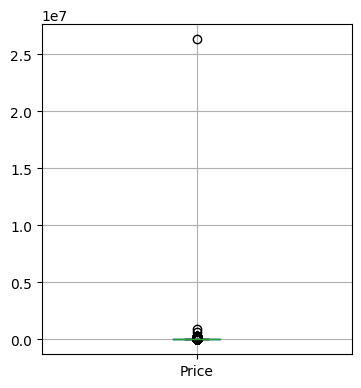

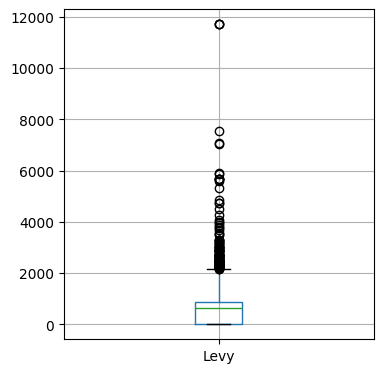

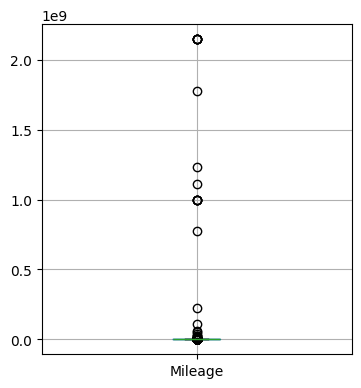

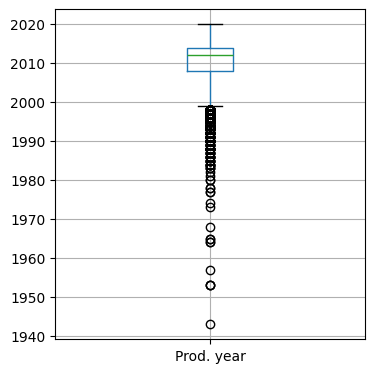

In [108]:
numeric_features_with_outliers = [
    "Price",
    "Levy",
    "Mileage",
    "Prod. year",
]

i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

In [109]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Количество строк до удаления выбросов: {len(df)}")

for column in numeric_features_with_outliers:
    df = remove_outliers(df, column)

print(f"Количество строк после удаления выбросов: {len(df)}")

Количество строк до удаления выбросов: 14801
Количество строк после удаления выбросов: 12597


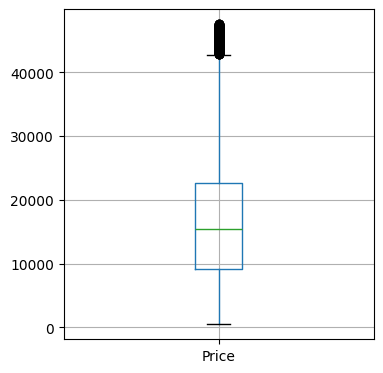

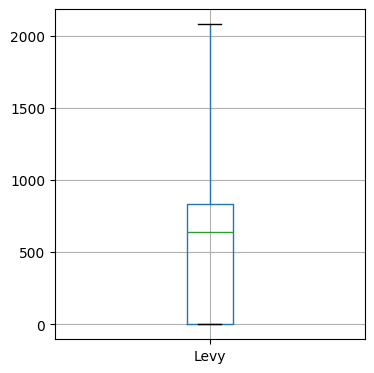

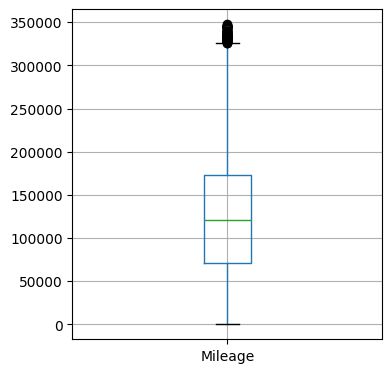

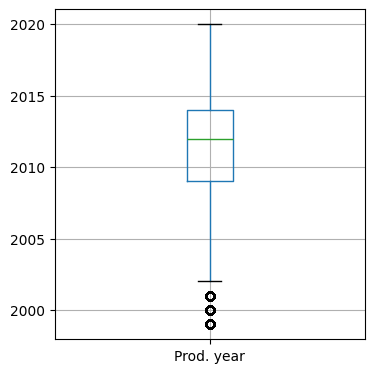

In [110]:
i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

#### Разбиение на выборки

In [112]:
X = df
y = df["Category"]

train_df, test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df.shape[0]} записей")
print(train_df.Category.value_counts())
print(f"Тестовая выборка: {test_df.shape[0]} записей")
print(test_df.Category.value_counts())

Размеры выборок:
Обучающая выборка: 8817 записей
Category
Sedan          3954
Jeep           2263
Hatchback      1554
Minivan         312
Coupe           251
Universal       180
Microbus        143
Goods wagon     120
Pickup           22
Cabriolet        16
Limousine         2
Name: count, dtype: int64
Тестовая выборка: 3780 записей
Category
Sedan          1692
Jeep            990
Hatchback       636
Minivan         151
Coupe           117
Universal        82
Goods wagon      52
Microbus         46
Pickup            8
Cabriolet         5
Limousine         1
Name: count, dtype: int64


#### Oversampling

In [113]:
def oversample(df):
    X = df.drop("Category", axis=1)
    y = df["Category"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)  # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_overs = oversample(train_df)
test_df_overs = oversample(test_df)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df_overs.shape[0]} записей")
print(train_df_overs.Category.value_counts())
print(f"Тестовая выборка: {test_df_overs.shape[0]} записей")
print(test_df_overs.Category.value_counts())

Размеры выборок:
Обучающая выборка: 43494 записей
Category
Sedan          3954
Jeep           3954
Universal      3954
Hatchback      3954
Coupe          3954
Goods wagon    3954
Minivan        3954
Microbus       3954
Pickup         3954
Limousine      3954
Cabriolet      3954
Name: count, dtype: int64
Тестовая выборка: 18612 записей
Category
Hatchback      1692
Sedan          1692
Universal      1692
Jeep           1692
Coupe          1692
Minivan        1692
Goods wagon    1692
Microbus       1692
Pickup         1692
Cabriolet      1692
Limousine      1692
Name: count, dtype: int64


#### Ручной синтез признаков.

In [114]:
def age_create(df): 
    df["Age"] = 2020 - df["Prod. year"]
    df = df.drop("Prod. year", axis=1)
    return df

train_df = age_create(train_df)
test_df = age_create(test_df)

In [115]:
sorted_df = train_df.sort_values(by="Age")
sorted_df["Age"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

<Axes: >

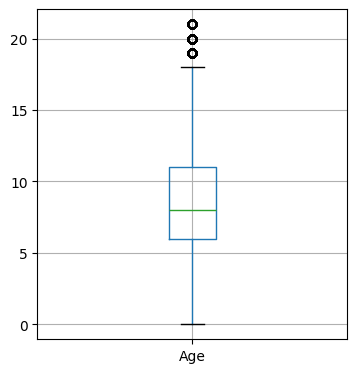

In [116]:
plt.figure(figsize=(4, 30))
plt.subplot(6, 1, i)
train_df.boxplot(column="Age")

#### Дискретизация числовых признаков

In [117]:
train_df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Age                   int64
dtype: object

In [118]:
numeric_features_for_discritization = ["Age"]

def discretize_features(df, features, bins=4, labels=["Новый", "Средний", "Старый", "Очень старый"]):
    for feature in features:
        try:
            df[f"{feature}_bin"] = pd.cut(df[feature], bins=bins, labels=labels)  # type: ignore
        except Exception as e:
            print(f"Ошибка при дискретизации признака {feature}: {e}")
    return df


train_df = discretize_features(train_df, numeric_features_for_discritization)
test_df = discretize_features(test_df, numeric_features_for_discritization)

train_df

Price  Levy Manufacturer              Model   Category  \
15146  18503     0       TOYOTA              Prius      Sedan   
14145   9722     0       TOYOTA             Ractis      Sedan   
8943   15367   584      HYUNDAI            Elantra      Sedan   
17889  11917     0       SUBARU  Forester L.L.BEAN       Jeep   
9515   46919  1327      HYUNDAI                 H1  Universal   
...      ...   ...          ...                ...        ...   
18201  10349     0         AUDI                 A4      Sedan   
7436    2038   765          KIA             Avella      Sedan   
7728   13485   843       TOYOTA              Prius  Hatchback   
1136   15677     0         FORD             Fiesta      Sedan   
10640  16308   751          KIA          Optima EX      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
15146               No    Petrol            1.8    13000          4   
14145               No    Petrol            1.5   116800          4   
8943                No    Petrol            1.8    78222          4   
17889              Yes       CNG            2.5   220000          4   
9515               Yes    Diesel            2.5    71689          4   
...                ...       ...            ...      ...        ...   
18201              Yes    Petrol            2.4   150000          6   
7436               Yes    Petrol            2.0   125621          4   
7728                No    Hybrid            1.5   212000          4   
1136                No    Petrol            1.6    74800          4   
10640              Yes    Petrol            2.4    92000         12   

      Gear box type Drive wheels           Doors             Wheel   Color  \
15146     Automatic        Front  Четырехдверный        Left wheel   White   
14145     Tiptronic        Front  Четырехдверный  Right-hand drive   Brown   
8943      Tiptronic        Front  Четырехдверный        Left wheel   Beige   
17889     Automatic          4x4  Четырехдверный        Left wheel   Green   
9515      Automatic        Front  Четырехдверный        Left wheel    Grey   
...             ...          ...             ...               ...     ...   
18201        Manual          4x4  Четырехдверный        Left wheel    Grey   
7436      Automatic        Front  Четырехдверный        Left wheel  Silver   
7728       Variator        Front  Четырехдверный        Left wheel  Silver   
1136      Automatic        Front  Четырехдверный        Left wheel  Silver   
10640     Tiptronic        Front  Четырехдверный        Left wheel  Silver   

       Airbags  Age       Age_bin  
15146        4    0         Новый  
14145        2   13        Старый  
8943        10    6       Средний  
17889        5   16  Очень старый  
9515         4    2         Новый  
...        ...  ...           ...  
18201        4   13        Старый  
7436        12    5         Новый  
7728         8   12        Старый  
1136         8    4         Новый  
10640        8    7       Средний  

[8817 rows x 18 columns]

#### Унитарное кодирование категориальных признаков

In [119]:
train_df.dtypes

Price                  int64
Levy                   int64
Manufacturer          object
Model                 object
Category              object
Leather interior      object
Fuel type             object
Engine volume        float64
Mileage                int64
Cylinders              int64
Gear box type         object
Drive wheels          object
Doors                 object
Wheel                 object
Color                 object
Airbags                int64
Age                    int64
Age_bin             category
dtype: object

In [120]:
categorical_features_for_encoding = [
    "Leather interior",
    "Category",
    "Fuel type",
    "Gear box type",
    "Drive wheels",
    "Doors",
    "Wheel",
    "Age_bin",
]

train_df = pd.get_dummies(train_df, columns=categorical_features_for_encoding)
test_df = pd.get_dummies(test_df, columns=categorical_features_for_encoding)

train_df

Price  Levy Manufacturer              Model  Engine volume  Mileage  \
15146  18503     0       TOYOTA              Prius            1.8    13000   
14145   9722     0       TOYOTA             Ractis            1.5   116800   
8943   15367   584      HYUNDAI            Elantra            1.8    78222   
17889  11917     0       SUBARU  Forester L.L.BEAN            2.5   220000   
9515   46919  1327      HYUNDAI                 H1            2.5    71689   
...      ...   ...          ...                ...            ...      ...   
18201  10349     0         AUDI                 A4            2.4   150000   
7436    2038   765          KIA             Avella            2.0   125621   
7728   13485   843       TOYOTA              Prius            1.5   212000   
1136   15677     0         FORD             Fiesta            1.6    74800   
10640  16308   751          KIA          Optima EX            2.4    92000   

       Cylinders   Color  Airbags  Age  ...  Drive wheels_Rear  \
15146          4   White        4    0  ...              False   
14145          4   Brown        2   13  ...              False   
8943           4   Beige       10    6  ...              False   
17889          4   Green        5   16  ...              False   
9515           4    Grey        4    2  ...              False   
...          ...     ...      ...  ...  ...                ...   
18201          6    Grey        4   13  ...              False   
7436           4  Silver       12    5  ...              False   
7728           4  Silver        8   12  ...              False   
1136           4  Silver        8    4  ...              False   
10640         12  Silver        8    7  ...              False   

       Doors_Двухдверный  Doors_Многодверный  Doors_Четырехдверный  \
15146              False               False                  True   
14145              False               False                  True   
8943               False               False                  True   
17889              False               False                  True   
9515               False               False                  True   
...                  ...                 ...                   ...   
18201              False               False                  True   
7436               False               False                  True   
7728               False               False                  True   
1136               False               False                  True   
10640              False               False                  True   

       Wheel_Left wheel  Wheel_Right-hand drive  Age_bin_Новый  \
15146              True                   False           True   
14145             False                    True          False   
8943               True                   False          False   
17889              True                   False          False   
9515               True                   False           True   
...                 ...                     ...            ...   
18201              True                   False          False   
7436               True                   False           True   
7728               True                   False          False   
1136               True                   False           True   
10640              True                   False          False   

       Age_bin_Средний  Age_bin_Старый  Age_bin_Очень старый  
15146            False           False                 False  
14145            False            True                 False  
8943              True           False                 False  
17889            False           False                  True  
9515             False           False                 False  
...                ...             ...                   ...  
18201            False            True                 False  
7436             False           False                 False  
7728             False            True                 False  
1136         

#### Масштабирование признаков

In [121]:
train_df.dtypes

Price                         int64
Levy                          int64
Manufacturer                 object
Model                        object
Engine volume               float64
Mileage                       int64
Cylinders                     int64
Color                        object
Airbags                       int64
Age                           int64
Leather interior_No            bool
Leather interior_Yes           bool
Category_Cabriolet             bool
Category_Coupe                 bool
Category_Goods wagon           bool
Category_Hatchback             bool
Category_Jeep                  bool
Category_Limousine             bool
Category_Microbus              bool
Category_Minivan               bool
Category_Pickup                bool
Category_Sedan                 bool
Category_Universal             bool
Fuel type_CNG                  bool
Fuel type_Diesel               bool
Fuel type_Hybrid               bool
Fuel type_Hydrogen             bool
Fuel type_LPG               

In [122]:
scaler = StandardScaler()

numeric_features_for_stardartization = [
    "Price",
    "Levy",
    "Engine volume",
    "Mileage",
    "Cylinders",
    "Airbags",
    "Age",
]

train_df[numeric_features_for_stardartization] = scaler.fit_transform(
    train_df[numeric_features_for_stardartization]
)
test_df[numeric_features_for_stardartization] = scaler.transform(
    test_df[numeric_features_for_stardartization]
)

train_df

Price      Levy Manufacturer              Model  Engine volume  \
15146  0.153774 -1.192982       TOYOTA              Prius      -0.479341   
14145 -0.658018 -1.192982       TOYOTA             Ractis      -0.887855   
8943  -0.136145  0.081576      HYUNDAI            Elantra      -0.479341   
17889 -0.455093 -1.192982       SUBARU  Forester L.L.BEAN       0.473858   
9515   2.780795  1.703146      HYUNDAI                 H1       0.473858   
...         ...       ...          ...                ...            ...   
18201 -0.600053 -1.192982         AUDI                 A4       0.337687   
7436  -1.368394  0.476602          KIA             Avella      -0.206998   
7728  -0.310134  0.646834       TOYOTA              Prius      -0.887855   
1136  -0.107486 -1.192982         FORD             Fiesta      -0.751684   
10640 -0.049151  0.446048          KIA          Optima EX       0.337687   

        Mileage  Cylinders   Color   Airbags       Age  ...  \
15146 -1.531744  -0.403213   White -0.683755 -1.946936  ...   
14145 -0.130245  -0.403213   Brown -1.190217  0.879266  ...   
8943  -0.651122  -0.403213   Beige  0.835631 -0.642535  ...   
17889  1.263152  -0.403213   Green -0.430524  1.531466  ...   
9515  -0.739330  -0.403213    Grey -0.683755 -1.512135  ...   
...         ...        ...     ...       ...       ...  ...   
18201  0.318018   1.538421    Grey -0.683755  0.879266  ...   
7436  -0.011145  -0.403213  Silver  1.342092 -0.859935  ...   
7728   1.155137  -0.403213  Silver  0.329169  0.661866  ...   
1136  -0.697325  -0.403213  Silver  0.329169 -1.077335  ...   
10640 -0.465093   7.363324  Silver  0.329169 -0.425135  ...   

       Drive wheels_Rear  Doors_Двухдверный  Doors_Многодверный  \
15146              False              False               False   
14145              False              False               False   
8943               False              False               False   
17889              False              False               False   
9515               False              False               False   
...                  ...                ...                 ...   
18201              False              False               False   
7436               False              False               False   
7728               False              False               False   
1136               False              False               False   
10640              False              False               False   

       Doors_Четырехдверный  Wheel_Left wheel  Wheel_Right-hand drive  \
15146                  True              True                   False   
14145                  True             False                    True   
8943                   True              True                   False   
17889                  True              True                   False   
9515                   True              True                   False   
...                     ...               ...                     ...   
18201                  True              True                   False   
7436                   True              True                   False   
7728                   True              True                   False   
1136                   True              True                   False   
10640                  True              True                   False   

       Age_bin_Новый  Age_bin_Средний  Age_bin_Старый  Age_bin_Очень старый  
15146           True            False           False                 False  
14145          False            False            True                 False  
8943           False             True           False                 False  
17889          False            False           False                  True  
9515            True            False           False                 False  
...              ...              ...             ...                   ...  
18201          False            False            True                 False  
7436            True            Fa

#### Конструирование признаков с помощью Featuretools

In [123]:
es = ft.EntitySet(id="car_data")
es = es.add_dataframe(dataframe_name="train", dataframe=train_df, index="id")
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="train",
    max_depth=1,
)

c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling 

In [124]:
feature_defs

[<Feature: Price>,
 <Feature: Levy>,
 <Feature: Manufacturer>,
 <Feature: Model>,
 <Feature: Engine volume>,
 <Feature: Mileage>,
 <Feature: Cylinders>,
 <Feature: Color>,
 <Feature: Airbags>,
 <Feature: Age>,
 <Feature: Leather interior_No>,
 <Feature: Leather interior_Yes>,
 <Feature: Category_Cabriolet>,
 <Feature: Category_Coupe>,
 <Feature: Category_Goods wagon>,
 <Feature: Category_Hatchback>,
 <Feature: Category_Jeep>,
 <Feature: Category_Limousine>,
 <Feature: Category_Microbus>,
 <Feature: Category_Minivan>,
 <Feature: Category_Pickup>,
 <Feature: Category_Sedan>,
 <Feature: Category_Universal>,
 <Feature: Fuel type_CNG>,
 <Feature: Fuel type_Diesel>,
 <Feature: Fuel type_Hybrid>,
 <Feature: Fuel type_Hydrogen>,
 <Feature: Fuel type_LPG>,
 <Feature: Fuel type_Petrol>,
 <Feature: Fuel type_Plug-in Hybrid>,
 <Feature: Gear box type_Automatic>,
 <Feature: Gear box type_Manual>,
 <Feature: Gear box type_Tiptronic>,
 <Feature: Gear box type_Variator>,
 <Feature: Drive wheels_4x4>,
